In [30]:
# Authors: Sarah and Claudia

# Pointing Technique Study

## Design and Procedure

We conduct a study in which we measure the task completion time of a user to click the correct circle under different conditions. For this purpose, we created an app that displays several randomly placed circles and a highlighted target that has to be clicked on.

The conditions are presented in a counter-balanced order (Balanced Latin Squares):
- The user gets 20 big circles with radius 100 pixels and no distractions
- The user gets 75 small circles with radius 50 pixels and no distractions
- The user gets 20 big circles with radius 100 pixels and with color flicker of circles
- The user gets 75 small circles with radius 50 pixels and color flicker of circles
- The user gets 20 big circles with radius 100 pixels and color flicker of circles as well as background 
- The user gets 75 small circles with radius 50 pixels and color flicker of circles as well as background

All parameters, such as the radius of the circles, the number of circles, the color of the circles, the target and the background, as well as whether the condition is carried out with distractions or without, are defined in a config file which is read in through console parameters. In our test, the circles were colored black, the target red and the background orange. The color for the flicker was yellow. The previous parameters of the conditions (radius and number of circles) were set by us for the study but can be changed.

The study starts with an information text that defines the color of the target to be clicked on by the participant as soon as possible. With each condition, the participant is asked to click on five different targets which are presented in a random order. 
The start position of the mouse is approximately set by clicking the blue circle in the lower left corner of the window before the beginning of each task because setting a fixed mouse position, resulted in a lot of problems. 
The conditions are presented in a counter-balanced order. At the end of all turns, the participant is informed about having completed the task. 

Each time the left mouse button is clicked, the following data is logged:
- participant id
- pointer type
- condition
- start and end position of the mouse cursor
- distance from start to end position
- number of circles
- diameter of the circles
- timestamp
- task completion time
- if a circle is clicked
- if the clicked circle is the correct target

The design of the study is within-subject, so that each participant completed each condition for both the normal and the novel pointer.

## Pointing Technique
To support the participant in performing the task and to probably reduce the task completion time, we have developed a pointing technique which moves the cursor to the target when the distance to the target falls under a certain threshold. Linear interpolation is used to move the mouse to the target. 



## Hypotheses
Our hypotheses are that task completion time should increase when targets are smaller, when the distance from the starting point to the target is longer and as the user is distracted by visual stimuli (color flicker). 
Furthermore the use of the novel pointer should reduce the task completion time across all conditions.

## Variables
Based on the hypotheses, the dependent variable is the task completion time measured in milliseconds via logging the left mouse button. The independent variables are the conditions (with their circle size, color and distractions) and the pointing technique (normal or novel). As control variables we document the mouse as pointing device, the window size (800 x 600 pixels), the global position of the window in the middle of the screen and the position of the mouse pointer at the bottom left hand corner of the window.

## Participants
Due to the current pandemic situation and limited time the selection of participants is limited to two female media informatics master students aged 22 and 25. 

# Pointing Technique Analayis


## Structured Analysis
### Import all relevant libraries

In [1]:
!pip3 install pingouin

In [1]:
import pandas as pd
import pingouin as pg
import seaborn as sns
from matplotlib import pyplot as plt

### All csv column names and csv items that are used more than once as variables

In [2]:
# column names
PARTICIPANT_ID = "participant_id"
CONDITION = "condition"
POINTER_TYPE = "pointer_type"
DISTANCE_TO_START_POSITION = "distance_to_start_position"

CIRCLE_COUNT = "circle_count"
CIRCLE_SIZE = "circle_size"
IS_CIRCLE_CLICKED = "is_circle_clicked"
IS_TARGET = "is_target"

TASK_COMPLETION_TIME = "task_completion_time_in_ms"

# pointer values
POINTER_NORMAL = "normal"
POINTER_NOVEL = "novel"

# labels
CONDITION_LABEL = "Condition"
POINTER_LABEL = "Pointer type"
TASK_COMPLETION_TIME_LABEL = "Task completion time [ms]"

### Read csv file

In [3]:
raw_data_1_1_normal = pd.read_csv("./1_1_normal.csv")
raw_data_1_2_novel = pd.read_csv("./1_2_novel.csv")
raw_data_2_1_novel = pd.read_csv("./2_1_novel.csv")
raw_data_2_2_normal = pd.read_csv("./2_2_normal.csv")

# raw_data_3_1_novel = pd.read_csv("./3_1_novel.csv")
# raw_data_3_2_normal = pd.read_csv("./3_2_normal.csv")
# raw_data_4_1_normal = pd.read_csv("./4_1_normal.csv")
# raw_data_4_2_novel = pd.read_csv("./4_2_novel.csv")

### Combine the individual tables of the participants and save them

In [5]:
normal_pointing_technique = pd.concat([
    raw_data_1_1_normal,
    raw_data_2_2_normal
    # raw_data_3_2_normal,
    # raw_data_4_1_normal
])

novel_pointing_technique = pd.concat([
    raw_data_1_2_novel,
    raw_data_2_1_novel
    # raw_data_3_1_novel,
    # raw_data_4_2_novel
])

normal_pointing_technique.to_csv("normal_pointing_technique_table.csv", index=False)
novel_pointing_technique.to_csv("novel_pointing_technique_table.csv", index=False)

In [6]:
normal_pointing_technique

,participant_id,condition,pointer_type,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,is_circle_clicked,is_target,task_completion_time_in_ms,timestamp
0,1,1,normal,30,574,633,435,618.813381,20,100,True,True,849.544,2021-05-12 13:17:47.390043
1,1,1,normal,23,566,772,679,757.476072,20,100,True,True,648.232,2021-05-12 13:17:48.893758
2,1,1,normal,28,570,877,400,865.852759,20,100,True,True,1258.421,2021-05-12 13:17:51.077735
3,1,1,normal,23,572,666,211,737.407621,20,100,True,True,762.691,2021-05-12 13:17:52.733974
4,1,1,normal,18,581,893,469,882.138878,20,100,True,True,734.260,2021-05-12 13:17:54.381754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,2,1,normal,32,571,600,485,574.473672,20,100,True,True,520.730,2021-05-12 13:27:08.678020
26,2,1,normal,36,580,729,777,720.456800,20,100,True,True,538.937,2021-05-12 13:27:10.013792
27,2,1,normal,25,572,664,307,691.770193,20,100,True,True,543.362,2021-05-12 13:27:11.237999
28,2,1,normal,30,574,834,494,807.970296,20,100,True,True,698.057,2021-05-12 13:27:12.877905


In [7]:
novel_pointing_technique

,participant_id,condition,pointer_type,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,is_circle_clicked,is_target,task_completion_time_in_ms,timestamp
0,1,2,novel,31,570,561,475,538.446840,75,50,True,True,624.891,2021-05-12 13:22:38.710035
1,1,2,novel,21,570,832,545,811.385235,75,50,True,True,805.304,2021-05-12 13:22:40.760116
2,1,2,novel,30,577,821,448,801.449936,75,50,True,True,909.796,2021-05-12 13:22:42.702029
3,1,2,novel,24,586,629,281,677.532287,75,50,True,True,1256.515,2021-05-12 13:22:45.056019
4,1,2,novel,16,568,686,736,690.741630,75,50,True,True,1067.809,2021-05-12 13:22:47.318038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,2,6,novel,16,587,16,586,1.000000,75,50,False,False,NaN,2021-05-12 13:25:53.473671
28,2,6,novel,16,587,566,470,562.306856,75,50,True,True,688.572,2021-05-12 13:25:54.158022
29,2,6,novel,29,571,827,461,805.545778,75,50,True,True,852.611,2021-05-12 13:25:55.830058
30,2,6,novel,21,579,613,295,656.597289,75,50,True,True,887.567,2021-05-12 13:25:57.624030


In [8]:
pointing_technique_table = pd.concat([
    normal_pointing_technique,
    novel_pointing_technique
])

pointing_technique_table

,participant_id,condition,pointer_type,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,is_circle_clicked,is_target,task_completion_time_in_ms,timestamp
0,1,1,normal,30,574,633,435,618.813381,20,100,True,True,849.544,2021-05-12 13:17:47.390043
1,1,1,normal,23,566,772,679,757.476072,20,100,True,True,648.232,2021-05-12 13:17:48.893758
2,1,1,normal,28,570,877,400,865.852759,20,100,True,True,1258.421,2021-05-12 13:17:51.077735
3,1,1,normal,23,572,666,211,737.407621,20,100,True,True,762.691,2021-05-12 13:17:52.733974
4,1,1,normal,18,581,893,469,882.138878,20,100,True,True,734.260,2021-05-12 13:17:54.381754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,2,6,novel,16,587,16,586,1.000000,75,50,False,False,NaN,2021-05-12 13:25:53.473671
28,2,6,novel,16,587,566,470,562.306856,75,50,True,True,688.572,2021-05-12 13:25:54.158022
29,2,6,novel,29,571,827,461,805.545778,75,50,True,True,852.611,2021-05-12 13:25:55.830058
30,2,6,novel,21,579,613,295,656.597289,75,50,True,True,887.567,2021-05-12 13:25:57.624030


### Filter the data with relevant columns for analysis of task completion time and save the result

In [9]:
filtered_data = pointing_technique_table[
    [PARTICIPANT_ID, CONDITION, POINTER_TYPE, DISTANCE_TO_START_POSITION, IS_CIRCLE_CLICKED, IS_TARGET, TASK_COMPLETION_TIME]]

filtered_data.to_csv("filtered_data.csv", index=False)

filtered_data

,participant_id,condition,pointer_type,distance_to_start_position,is_circle_clicked,is_target,task_completion_time_in_ms
0,1,1,normal,618.813381,True,True,849.544
1,1,1,normal,757.476072,True,True,648.232
2,1,1,normal,865.852759,True,True,1258.421
3,1,1,normal,737.407621,True,True,762.691
4,1,1,normal,882.138878,True,True,734.260
...,...,...,...,...,...,...,...
27,2,6,novel,1.000000,False,False,NaN
28,2,6,novel,562.306856,True,True,688.572
29,2,6,novel,805.545778,True,True,852.611
30,2,6,novel,656.597289,True,True,887.567


### Filter the data so that only the reaction times when the user clicked the target are included

In [10]:
correct_clicks = filtered_data[filtered_data[IS_TARGET]]
correct_clicks = correct_clicks[
    [PARTICIPANT_ID, CONDITION, POINTER_TYPE, DISTANCE_TO_START_POSITION, TASK_COMPLETION_TIME]]

correct_clicks.to_csv("correct_clicks.csv", index=False)
correct_clicks

,participant_id,condition,pointer_type,distance_to_start_position,task_completion_time_in_ms
0,1,1,normal,618.813381,849.544
1,1,1,normal,757.476072,648.232
2,1,1,normal,865.852759,1258.421
3,1,1,normal,737.407621,762.691
4,1,1,normal,882.138878,734.260
...,...,...,...,...,...
26,2,6,novel,827.698617,803.517
28,2,6,novel,562.306856,688.572
29,2,6,novel,805.545778,852.611
30,2,6,novel,656.597289,887.567


## Statistics for all tables

In [11]:
pointing_technique_table.describe()

,participant_id,condition,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,task_completion_time_in_ms
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,120.000000
mean,1.496000,3.504000,25.728000,575.936000,719.104000,484.720000,717.495156,47.720000,74.800000,754.722708
std,0.501996,1.730299,8.551906,7.764418,142.421842,152.074239,133.864868,27.609781,25.099801,243.439839
min,1.000000,1.000000,4.000000,558.000000,16.000000,184.000000,1.000000,20.000000,50.000000,380.813000
25%,1.000000,2.000000,20.000000,570.000000,625.000000,388.000000,651.248800,20.000000,50.000000,594.699000
50%,1.000000,3.000000,26.000000,576.000000,703.000000,473.000000,719.123077,75.000000,50.000000,703.710500
75%,2.000000,5.000000,32.000000,581.000000,849.000000,563.000000,826.467180,75.000000,100.000000,845.580250
max,2.000000,6.000000,44.000000,596.000000,906.000000,790.000000,901.568078,75.000000,100.000000,1614.827000


In [12]:
normal_pointing_technique.describe()

,participant_id,condition,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,task_completion_time_in_ms
count,61.000000,61.00000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,60.000000
mean,1.491803,3.47541,24.049180,577.344262,740.016393,462.311475,742.823516,47.950820,74.590164,731.585667
std,0.504082,1.71859,8.305473,7.547373,121.326762,154.105758,111.233663,27.724494,25.204085,174.831050
min,1.000000,1.00000,5.000000,562.000000,313.000000,184.000000,400.711867,20.000000,50.000000,478.201000
25%,1.000000,2.00000,18.000000,572.000000,650.000000,371.000000,666.588329,20.000000,50.000000,618.903750
50%,1.000000,3.00000,24.000000,577.000000,729.000000,452.000000,742.796069,75.000000,50.000000,706.920000
75%,2.000000,5.00000,30.000000,582.000000,856.000000,547.000000,837.004779,75.000000,100.000000,794.123500
max,2.000000,6.00000,42.000000,596.000000,906.000000,777.000000,901.568078,75.000000,100.000000,1342.389000


In [13]:
novel_pointing_technique.describe()

,participant_id,condition,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,task_completion_time_in_ms
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,60.000000
mean,1.500000,3.531250,27.328125,574.593750,699.171875,506.078125,693.354064,47.500000,75.000000,777.859750
std,0.503953,1.754529,8.539460,7.788308,158.359602,148.160928,149.244027,27.717395,25.197632,296.438323
min,1.000000,1.000000,4.000000,558.000000,16.000000,260.000000,1.000000,20.000000,50.000000,380.813000
25%,1.000000,2.000000,22.750000,568.750000,613.000000,447.750000,635.797932,20.000000,50.000000,553.115750
50%,1.500000,3.500000,28.000000,574.500000,698.500000,487.000000,685.719613,47.500000,75.000000,699.123500
75%,2.000000,5.000000,32.250000,580.000000,842.250000,567.500000,817.255481,75.000000,100.000000,890.401500
max,2.000000,6.000000,44.000000,590.000000,893.000000,790.000000,860.000581,75.000000,100.000000,1614.827000


In [16]:
# TODO IS_TARGET
correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL].describe()

,participant_id,condition,distance_to_start_position,task_completion_time_in_ms
count,60.000000,60.000000,60.000000,60.000000
mean,1.500000,3.500000,748.525377,731.585667
std,0.504219,1.722237,102.790277,174.831050
min,1.000000,1.000000,554.033392,478.201000
25%,1.000000,2.000000,672.451886,618.903750
50%,1.500000,3.500000,746.258342,706.920000
75%,2.000000,5.000000,838.229533,794.123500
max,2.000000,6.000000,901.568078,1342.389000


In [17]:
# TODO IS_TARGET
correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL].describe()

,participant_id,condition,distance_to_start_position,task_completion_time_in_ms
count,60.000000,60.000000,60.000000,60.000000
mean,1.500000,3.500000,718.085820,777.859750
std,0.504219,1.722237,101.241052,296.438323
min,1.000000,1.000000,538.446840,380.813000
25%,1.000000,2.000000,651.040605,553.115750
50%,1.500000,3.500000,690.507382,699.123500
75%,2.000000,5.000000,822.348751,890.401500
max,2.000000,6.000000,860.000581,1614.827000


## Visualizations
appropriate visualizations that indicate absolute and relative pointing performance (task completion times, errors) of pointing
technique and standard pointer behavior and of individual participants

### Scatter plots

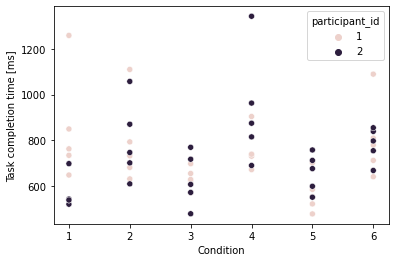

In [34]:
scatter_plot = sns.scatterplot(
    data=correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL],
    x=CONDITION,
    y=TASK_COMPLETION_TIME,
    hue=PARTICIPANT_ID,
)
scatter_plot.set(xlabel=CONDITION_LABEL, ylabel=TASK_COMPLETION_TIME_LABEL)
plt.show()

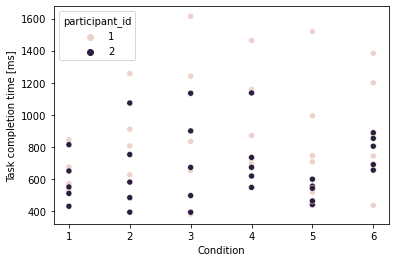

In [35]:
scatter_plot = sns.scatterplot(
    data=correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL],
    x=CONDITION,
    y=TASK_COMPLETION_TIME,
    hue=PARTICIPANT_ID,
)
scatter_plot.set(xlabel=CONDITION_LABEL, ylabel=TASK_COMPLETION_TIME_LABEL)
plt.show()

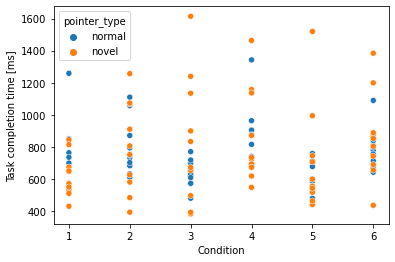

In [36]:
scatter_plot = sns.scatterplot(
    data=correct_clicks,
    x=CONDITION,
    y=TASK_COMPLETION_TIME,
    hue=POINTER_TYPE
)
scatter_plot.set(xlabel=CONDITION_LABEL, ylabel=TASK_COMPLETION_TIME_LABEL)
plt.show()

### Swarm plots

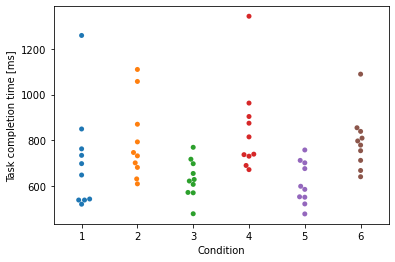

In [21]:
swarm_plot = sns.swarmplot(
    data=correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL],
    y=TASK_COMPLETION_TIME,
    x=CONDITION,
)
swarm_plot.set(xlabel=CONDITION_LABEL, ylabel=TASK_COMPLETION_TIME_LABEL)

plt.show()

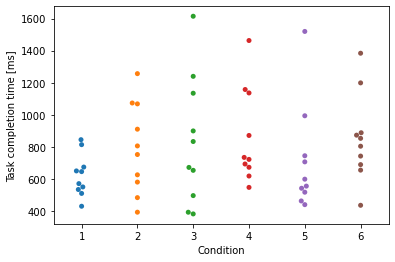

In [22]:
swarm_plot = sns.swarmplot(
    data=correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL],
    y=TASK_COMPLETION_TIME,
    x=CONDITION,
)
swarm_plot.set(xlabel=CONDITION_LABEL, ylabel=TASK_COMPLETION_TIME_LABEL)

plt.show()

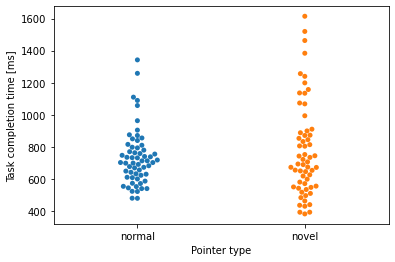

In [23]:
swarm_plot = sns.swarmplot(
    data=correct_clicks,
    y=TASK_COMPLETION_TIME,
    x=POINTER_TYPE,
)
swarm_plot.set(xlabel=POINTER_LABEL, ylabel=TASK_COMPLETION_TIME_LABEL)

plt.show()

### Boxplot

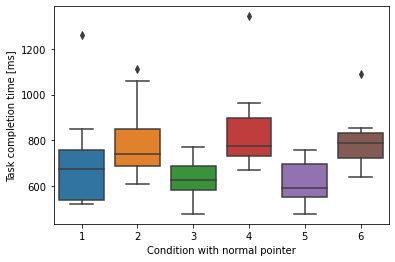

In [32]:
box_plot = sns.boxplot(
    data=correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL],
    x=CONDITION,
    y=TASK_COMPLETION_TIME
)

box_plot.set(xlabel=CONDITION_LABEL + " with normal pointer", ylabel=TASK_COMPLETION_TIME_LABEL)

plt.show()

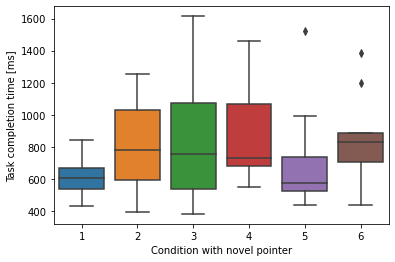

In [31]:
box_plot = sns.boxplot(
    data=correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL],
    x=CONDITION,
    y=TASK_COMPLETION_TIME
)

box_plot.set(xlabel=CONDITION_LABEL + " with novel pointer", ylabel=TASK_COMPLETION_TIME_LABEL)

plt.show()

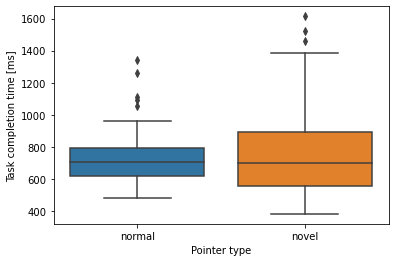

In [33]:
box_plot = sns.boxplot(
    data=correct_clicks,
    x=POINTER_TYPE,
    y=TASK_COMPLETION_TIME
)

box_plot.set(xlabel=POINTER_LABEL, ylabel=TASK_COMPLETION_TIME_LABEL)

plt.show()

## T-test

In [27]:
pg.homoscedasticity(data=correct_clicks, dv=TASK_COMPLETION_TIME, group=POINTER_TYPE, method="bartlett")

,T,pval,equal_var
bartlett,15.605252,0.000078,False


In [28]:
pg.normality(data=correct_clicks, dv=TASK_COMPLETION_TIME, group=POINTER_TYPE)

,W,pval,normal
normal,0.893735,0.000078,False
novel,0.915297,0.000499,False


In [29]:
pg.welch_anova(data=correct_clicks, dv=TASK_COMPLETION_TIME, between=POINTER_TYPE)

,Source,ddof1,ddof2,F,p-unc,np2
0,pointer_type,1,95.614243,1.084733,0.300268,0.009109


## Results
For "novel", the average task completion time is slightly lower (M =  ms, SD = , n=) than for "normal" (M = , SD = , n=). The boxplot visualises these results. Moreover, in the plot we can identify ... outliers
# TODO: summary statistics and visualizations that show whether the initial hypotheses seem to be correct.
A Welch-Anova-test show that the differences between the two pionting techniques are over significant (t() = , p < 0,001). According to Cohen (2013) defining .01 as a small effect, .06 as a medium effect and .14 as a large effect, we have a small effect ($\eta²$ = ). This implies that there are small differences regarding the reaction time between the two conditions and the hypothesis is confirmed.


__Source:__ Cohen, J. (2013). Statistical power analysis for the behavioral sciences. Academic press.

## Discussion
